In [8]:
#单个股票公司爬取股票
import requests
import re
# AAPL是苹果公司的股票代码
stock_code= "FB"
# 构造完整的获取股票历史信息的网页URL
url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
# 获取上述URL对应的网页
r = requests.get(url)
print(r)

<Response [200]>


In [6]:
# 定义正则表达式，找到所有我们需要的股票历史数据
result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
# 如果没有找到数据，prices就是None
if result is not None:
    print(result)

['[{"date":1611153000,"open":268.92999267578125,"high":270.32000732421875,"low":263.6000061035156,"close":267.4800109863281,"volume":25172300,"adjclose":267.4800109863281},{"date":1611066600,"open":256.8999938964844,"high":262.20001220703125,"low":252.72000122070312,"close":261.1000061035156,"volume":28028500,"adjclose":261.1000061035156},{"date":1610721000,"open":247.89999389648438,"high":253.86000061035156,"low":247.16000366210938,"close":251.36000061035156,"volume":24786100,"adjclose":251.36000061035156},{"date":1610634600,"open":253.39999389648438,"high":255.02999877929688,"low":244.61000061035156,"close":245.63999938964844,"volume":29739400,"adjclose":245.63999938964844},{"date":1610548200,"open":251.5500030517578,"high":253.9499969482422,"low":249.1999969482422,"close":251.63999938964844,"volume":19528900,"adjclose":251.63999938964844},{"date":1610461800,"open":256.6300048828125,"high":259.7200012207031,"low":250.3000030517578,"close":251.08999633789062,"volume":26449900,"adjclos

In [7]:
# 把需要的股票价格从查找的结果中提取出来
prices = eval(result[0])
prices[1]

{'date': 1611066600,
 'open': 256.8999938964844,
 'high': 262.20001220703125,
 'low': 252.72000122070312,
 'close': 261.1000061035156,
 'volume': 28028500,
 'adjclose': 261.1000061035156}

In [9]:
# 通过肉眼观察，我们可以看到上述结果中有一些比较奇怪的数据，需要进行数据清洗
quotes = [item for item in prices if not 'type' in item]
quotes[1]

{'date': 1611066600,
 'open': 256.8999938964844,
 'high': 262.20001220703125,
 'low': 252.72000122070312,
 'close': 261.1000061035156,
 'volume': 28028500,
 'adjclose': 261.1000061035156}

In [10]:
from datetime import date
# 同时，需要将数据中date字段中的时间戳转换成更加直观的日期格式
list1 = []
for i in range(len(quotes)):
    x = date.fromtimestamp(quotes[i]['date'])
    y = date.strftime(x,'%Y-%m-%d')
    list1.append(y)
list1[1]

'2021-01-19'

In [11]:
import pandas as pd
# 使用pandas模块提供的DataFrame对象存储股票数据，并将刚才的日期作为索引列的值
quotesdf_ori = pd.DataFrame(quotes, index = list1)
quotesdf_ori

,date,open,high,low,close,volume,adjclose
2021-01-20,1611153000,268.929993,270.320007,263.600006,267.480011,25172300,267.480011
2021-01-19,1611066600,256.899994,262.200012,252.720001,261.100006,28028500,261.100006
2021-01-15,1610721000,247.899994,253.860001,247.160004,251.360001,24786100,251.360001
2021-01-14,1610634600,253.399994,255.029999,244.610001,245.639999,29739400,245.639999
2021-01-13,1610548200,251.550003,253.949997,249.199997,251.639999,19528900,251.639999
...,...,...,...,...,...,...,...
2020-01-27,1580135400,213.100006,216.059998,212.500000,214.869995,13810700,214.869995
2020-01-24,1579876200,220.800003,221.779999,216.110001,217.940002,11905800,217.940002
2020-01-23,1579789800,220.750000,221.490005,219.270004,219.759995,11195000,219.759995
2020-01-22,1579703400,222.309998,222.750000,221.279999,221.320007,12212800,221.320007


In [13]:
import time
# 去掉原始数据中的时间戳数据，并按照月份进行分组
quotesdf = quotesdf_ori.drop(['date'], axis = 1)  # axis=1表示从某列中删除，axis=0表示从某行中删除
templist = []
for i in range(len(quotesdf)):
    temp = time.strptime(quotesdf.index[i],"%Y-%m-%d") # strptime()函数根据指定的格式把一个时间字符串解析为时间对象
    templist.append("{}/{:02}".format(temp.tm_year%100,temp.tm_mon))  # "{:02}"表示将月份改成2位且带前导0的格式
tempdf = quotesdf.copy()
tempdf['month'] = templist
tempdf

,open,high,low,close,volume,adjclose,month
2021-01-20,268.929993,270.320007,263.600006,267.480011,25172300,267.480011,21/01
2021-01-19,256.899994,262.200012,252.720001,261.100006,28028500,261.100006,21/01
2021-01-15,247.899994,253.860001,247.160004,251.360001,24786100,251.360001,21/01
2021-01-14,253.399994,255.029999,244.610001,245.639999,29739400,245.639999,21/01
2021-01-13,251.550003,253.949997,249.199997,251.639999,19528900,251.639999,21/01
...,...,...,...,...,...,...,...
2020-01-27,213.100006,216.059998,212.500000,214.869995,13810700,214.869995,20/01
2020-01-24,220.800003,221.779999,216.110001,217.940002,11905800,217.940002,20/01
2020-01-23,220.750000,221.490005,219.270004,219.759995,11195000,219.759995,20/01
2020-01-22,222.309998,222.750000,221.279999,221.320007,12212800,221.320007,20/01


In [14]:
# 通过对月份数据进行分组操作，求出苹果公司近一年来，每个月的平均收盘价
avgPrices = tempdf.groupby('month').close.mean()
avgPrices

month
20/01    216.421110
20/02    207.505263
20/03    165.747727
20/04    177.003335
20/05    216.549001
20/06    232.046363
20/07    239.211818
20/08    268.785717
20/09    266.551905
20/10    269.780910
20/11    276.306499
20/12    276.530907
21/01    260.390001
Name: close, dtype: float64

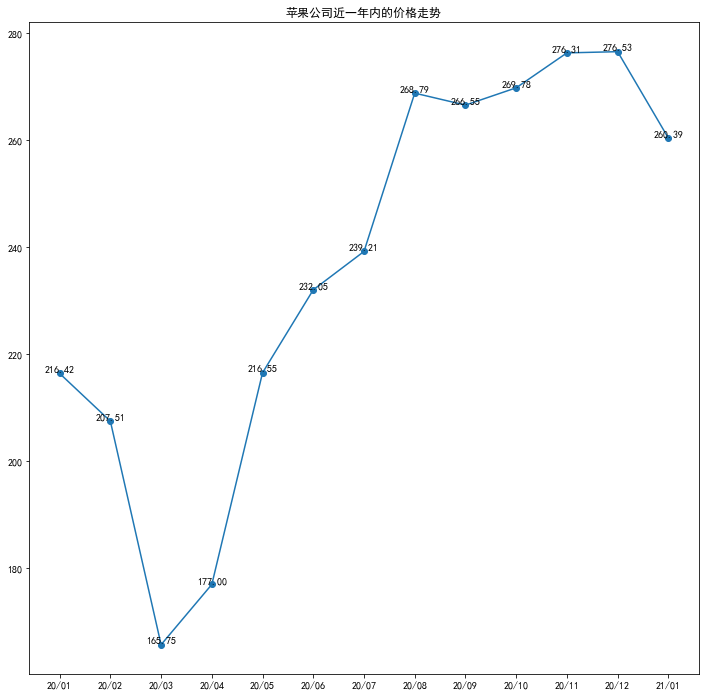

In [34]:
import matplotlib.pyplot as plt
# 将上述数据表示成折线图
x = list(avgPrices.index)
y = avgPrices.values
plt.figure(figsize=(12,12))
plt.plot(x, y,"-o")
# 在图表中加入中文标题的问题
# from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r"//System//Library//Fonts//STHeiti Medium.ttc", size=16)
# plt.title("苹果公司近一年内的价格走势")
# # 为每一个点加上数据标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.title('苹果公司近一年内的价格走势')
for a,b in zip(x,y):
    plt.text(a,b,"%.2f"%b,ha='center',va='bottom')
plt.show()

<Response [200]>
<Response [200]>
<Response [200]>


No handles with labels found to put in legend.


month
20/01     79.338057
20/02     77.817631
20/03     65.611023
20/04     68.096547
20/05     77.496376
20/06     86.451590
20/07     95.566250
20/08    117.299762
20/09    115.125237
20/10    116.413182
20/11    116.825999
20/12    127.290455
21/01    129.547500
Name: close, dtype: float64
month
20/01    166.972221
20/02    178.719474
20/03    152.554091
20/04    169.039525
20/05    182.342500
20/06    192.699547
20/07    207.080455
20/08    214.353333
20/09    208.807143
20/10    212.890455
20/11    214.138999
20/12    217.963181
21/01    216.746665
Name: close, dtype: float64
month
20/01    216.421110
20/02    207.505263
20/03    165.747727
20/04    177.003335
20/05    216.549001
20/06    232.046363
20/07    239.211818
20/08    268.785717
20/09    266.551905
20/10    269.780910
20/11    276.306499
20/12    276.530907
21/01    260.390001
Name: close, dtype: float64
<class 'numpy.ndarray'>


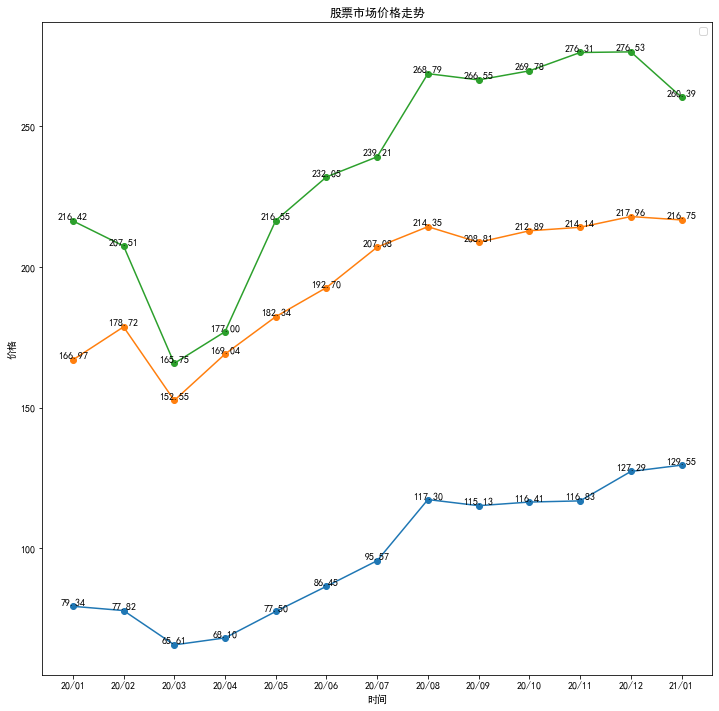

In [61]:
#对多个股票进行爬取
import requests
import re
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import time

stock_codes = ["AAPL","MSFT","FB"]
for stock_code in stock_codes:
    url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
    r = requests.get(url)
    print(r)
    result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
    if result is not None:
          result
    prices = eval(result[0])
    quotes = [item for item in prices if not 'type' in item]
    list1 = []
    for i in range(len(quotes)):
        x = date.fromtimestamp(quotes[i]['date'])
        y = date.strftime(x, '%Y-%m-%d')
        list1.append(y)
    quotesdf_ori = pd.DataFrame(quotes, index=list1)

    quotesdf = quotesdf_ori.drop(['date'], axis=1)
    templist = []
    for i in range(len(quotesdf)):
        temp = time.strptime(quotesdf.index[i], "%Y-%m-%d")
        templist.append("{}/{:02}".format(temp.tm_year % 100, temp.tm_mon))
    tempdf = quotesdf.copy()
    tempdf['month'] = templist
    tempdf.to_excel('%s.xlsx' % stock_code)
tempdf1 = pd.read_excel('AAPL.xls',index_col='date')
tempdf2 = pd.read_excel('MSFT.xls',index_col='date')
tempdf3 = pd.read_excel('FB.xls',index_col='date')
avgPrices1 = tempdf1.groupby('month').close.mean()
print(avgPrices1)
avgPrices2 = tempdf2.groupby('month').close.mean()
print(avgPrices2)
avgPrices3 = tempdf3.groupby('month').close.mean()
print(avgPrices3)
x = list(avgPrices1.index)
y1 = avgPrices1.values
print(type(y1))
y2 = avgPrices2.values
y3 = avgPrices3.values
plt.figure(figsize=(12, 12))
plt.plot(x, y1,'-o')
plt.plot(x, y2,'-o')
plt.plot(x, y3,'-o')
plt.xlabel('时间')
plt.ylabel('价格')
plt.title('股票市场价格走势')
for a, b in zip(x, y1):
         plt.text(a, b, "%.2f" % b, ha='center', va='bottom')
for a, b in zip(x, y2):
         plt.text(a, b, "%.2f" % b, ha='center', va='bottom')
for a, b in zip(x, y3):
         plt.text(a, b, "%.2f" % b, ha='center', va='bottom')
plt.legend()